# Number of fatalities of Male vs Female Drivers by Age

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

person = pd.read_csv("2015-traffic-fatalities/person.csv")
person


,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,127,1,1,2,...,240,0,0,0,0,0,0,7,1,0
1,1,10002,1,1,1,0,83,1,1,22,...,2213,0,0,0,0,0,0,7,1,0
2,1,10003,1,1,1,0,11,1,1,1,...,125,0,0,0,0,0,0,7,2,0
3,1,10003,1,1,2,0,11,1,1,1,...,8888,999,99,0,0,0,8,0,0,0
4,1,10004,1,1,1,0,45,4,1,0,...,57,0,0,0,0,0,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80582,56,560129,2,1,1,0,21,14,12,23,...,2305,0,0,0,0,0,0,7,1,0
80583,56,560129,2,1,2,0,21,14,12,23,...,8888,999,99,0,0,0,8,0,0,0
80584,56,560129,2,1,3,0,21,14,12,23,...,8888,999,99,0,0,0,8,0,0,0
80585,56,560129,2,2,1,0,21,14,12,23,...,8888,999,99,0,0,0,8,0,0,0


In [2]:
columns_to_keep = ['AGE',
                   'SEX',
                   'DRINKING',
                   'DRUGS',
                   'PER_TYP'
                    ]

#SEX: 1 = Male, 2 = Female
# DRINKING & DRUGS
# 0: No, Alcohol/Drugs NOT involved
# 1: Yes, Alcohol/Drugs involved
# 8: Not Reported
# 9: Unknown

driver_age = person[columns_to_keep]

driver_age

,AGE,SEX,DRINKING,DRUGS,PER_TYP
0,68,1,9,9,1
1,49,1,0,0,1
2,31,1,1,9,1
3,20,2,8,8,2
4,40,1,1,9,1
...,...,...,...,...,...
80582,26,1,0,1,1
80583,27,2,8,8,2
80584,0,1,8,8,2
80585,30,1,0,0,1


In [3]:
# PER_TYP = 1: Driver
driver_age = driver_age[driver_age['PER_TYP'] == 1]
driver_age

,AGE,SEX,DRINKING,DRUGS,PER_TYP
0,68,1,9,9,1
1,49,1,0,0,1
2,31,1,1,9,1
4,40,1,1,9,1
5,24,1,0,0,1
...,...,...,...,...,...
80580,48,1,0,0,1
80581,28,1,0,1,1
80582,26,1,0,1,1
80585,30,1,0,0,1


In [4]:
# DRINKING & DRUGS == 1: Alcohol/Drugs involved

driver_age = driver_age[driver_age['DRINKING'] != 1]
driver_age = driver_age[driver_age['DRUGS'] != 1]
driver_age

,AGE,SEX,DRINKING,DRUGS,PER_TYP
0,68,1,9,9,1
1,49,1,0,0,1
5,24,1,0,0,1
6,60,1,0,0,1
7,64,1,0,0,1
...,...,...,...,...,...
80573,25,2,0,0,1
80576,63,1,0,0,1
80580,48,1,0,0,1
80585,30,1,0,0,1


### Male Driver

In [5]:
male = driver_age[driver_age['SEX'] == 1]
male

,AGE,SEX,DRINKING,DRUGS,PER_TYP
0,68,1,9,9,1
1,49,1,0,0,1
5,24,1,0,0,1
6,60,1,0,0,1
7,64,1,0,0,1
...,...,...,...,...,...
80566,47,1,0,0,1
80576,63,1,0,0,1
80580,48,1,0,0,1
80585,30,1,0,0,1


In [6]:
# 'AGE' 000 - 120 = Age of individual
# 998: Not Reported
# 999: Unknown

male = male[male['AGE'] < 121]
male


,AGE,SEX,DRINKING,DRUGS,PER_TYP
0,68,1,9,9,1
1,49,1,0,0,1
5,24,1,0,0,1
6,60,1,0,0,1
7,64,1,0,0,1
...,...,...,...,...,...
80566,47,1,0,0,1
80576,63,1,0,0,1
80580,48,1,0,0,1
80585,30,1,0,0,1


In [7]:
male_asc = male.sort_values('AGE')
male_asc

,AGE,SEX,DRINKING,DRUGS,PER_TYP
4431,6,1,0,0,1
35886,6,1,0,0,1
66741,8,1,8,8,1
30521,8,1,0,0,1
19779,9,1,0,0,1
...,...,...,...,...,...
28096,97,1,9,9,1
16456,98,1,0,0,1
28338,98,1,8,8,1
20798,98,1,0,0,1


In [8]:
min = male.min()
min

AGE         6
SEX         1
DRINKING    0
DRUGS       0
PER_TYP     1
dtype: int64

In [9]:
max = male.max()
max

AGE         103
SEX           1
DRINKING      9
DRUGS         9
PER_TYP       1
dtype: int64

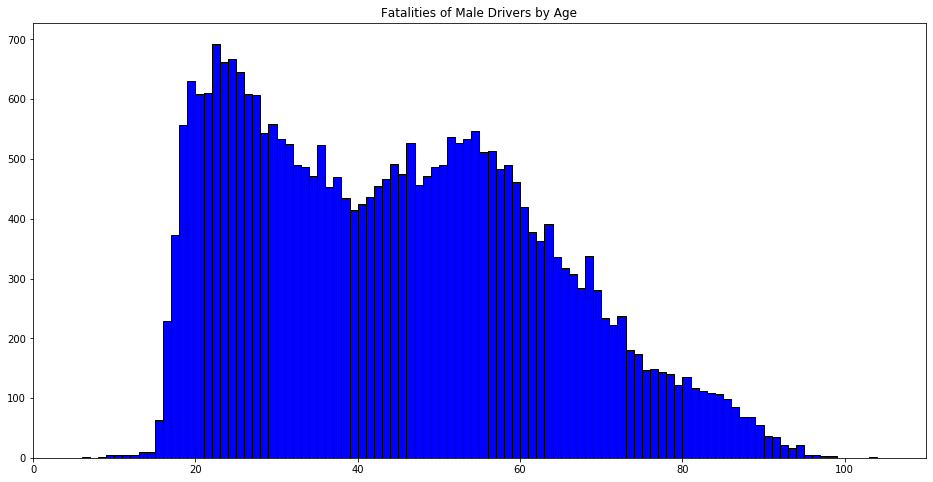

In [10]:
x = male['AGE']

fig, ax = plt.subplots(figsize=(16, 8))

plt.hist(x, 100, range=(5, 105), histtype='bar', align='mid', color='b', edgecolor='black', label='Male Driver')
plt.title("Fatalities of Male Drivers by Age")
plt.show()

### Female Driver

In [11]:
female = driver_age[driver_age['SEX'] == 2]
female

,AGE,SEX,DRINKING,DRUGS,PER_TYP
14,80,2,0,0,1
17,42,2,0,0,1
18,23,2,9,9,1
19,32,2,0,0,1
23,27,2,9,9,1
...,...,...,...,...,...
80540,26,2,0,0,1
80541,31,2,0,0,1
80547,18,2,0,0,1
80568,23,2,0,0,1


In [12]:
# 'AGE' 000 - 120 = Age of individual
# 998: Not Reported
# 999: Unknown

female = female[female['AGE'] < 121]
female

,AGE,SEX,DRINKING,DRUGS,PER_TYP
14,80,2,0,0,1
17,42,2,0,0,1
18,23,2,9,9,1
19,32,2,0,0,1
23,27,2,9,9,1
...,...,...,...,...,...
80540,26,2,0,0,1
80541,31,2,0,0,1
80547,18,2,0,0,1
80568,23,2,0,0,1


In [13]:
female_asc = female.sort_values('AGE')
female_asc

,AGE,SEX,DRINKING,DRUGS,PER_TYP
29297,7,2,0,0,1
31653,8,2,0,0,1
78681,8,2,0,0,1
74793,9,2,9,9,1
78184,9,2,0,8,1
...,...,...,...,...,...
54018,95,2,9,9,1
13369,96,2,0,0,1
27827,97,2,9,9,1
28339,97,2,9,9,1


In [14]:
min = female.min()
min

AGE         7
SEX         2
DRINKING    0
DRUGS       0
PER_TYP     1
dtype: int64

In [15]:
max = female.max()
max

AGE         99
SEX          2
DRINKING     9
DRUGS        9
PER_TYP      1
dtype: int64

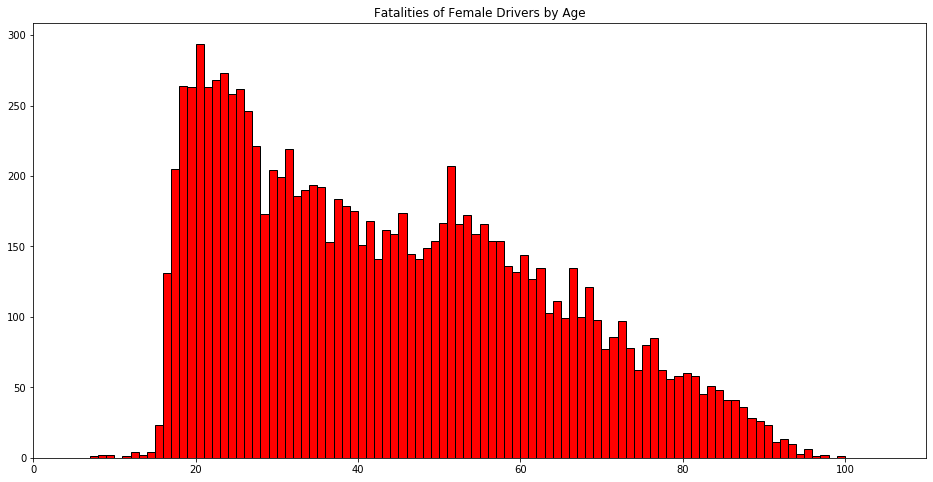

In [16]:
x = female['AGE']

fig, ax = plt.subplots(figsize=(16, 8))

plt.hist(x, 100, range=(5, 105), histtype='bar', align='mid', color='r', edgecolor='black', label='Female Driver')
plt.title("Fatalities of Female Drivers by Age")
plt.show()